#### Bases de l'Apprentissage
#### TP 1 - Décision Bayésienne
---

**Yuri DE SENE ALVIZI**


**1. Préliminaires**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from numpy.linalg import eig
import scipy
import math
from numpy.linalg import det


**2. Génération d'une variable aléatoire gaussienne**

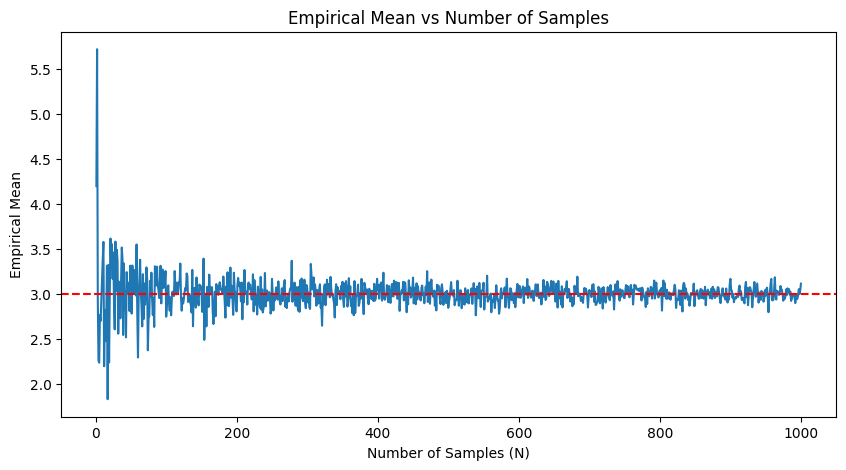

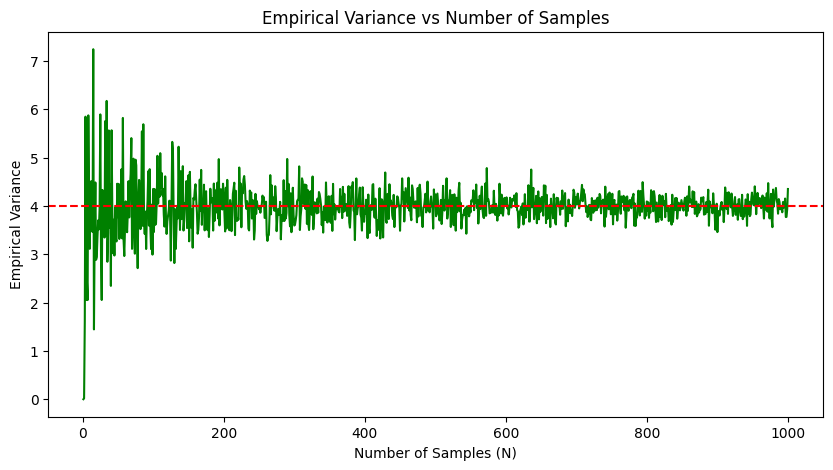

In [2]:
mean = 3
variance = 4

empirical_mean = []
empirical_variance = []

for N in range(1, 1001):
    samples = np.random.randn(N) * np.sqrt(variance) + mean
    empirical_mean.append(np.mean(samples))
    empirical_variance.append(np.var(samples))

# Empirical mean plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), empirical_mean)
plt.xlabel('Number of Samples (N)')
plt.ylabel('Empirical Mean')
plt.axhline(y=mean, color='r', linestyle='--')
plt.title('Empirical Mean vs Number of Samples')
plt.show()

# Empirical variance plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), empirical_variance, color='green')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Empirical Variance')
plt.axhline(y=variance, color='r', linestyle='--')
plt.title('Empirical Variance vs Number of Samples')
plt.show()

**3. Génération de vecteurs aléatoires gaussiens**

In [3]:
def generate_samples(N, mean, cov):
    normal_samples = np.random.randn(2, N)
    mean_vector = np.tile(mean, (N, 1)).T
    samples = np.dot(sqrtm(cov), normal_samples) + mean_vector
    return samples

**3.1)** Générer un échantillon de taille N=100 d'un vecteur aléatoire gaussien défini par le vecteur moyenne m=[4 9] et la matrice de covariance égale à l'identité. Afficher les échantillons.

Empirical mean: [4.09233656 9.11266807]
Empirical cov:
[[ 0.75130401 -0.04805549]
 [-0.04805549  0.99738977]]


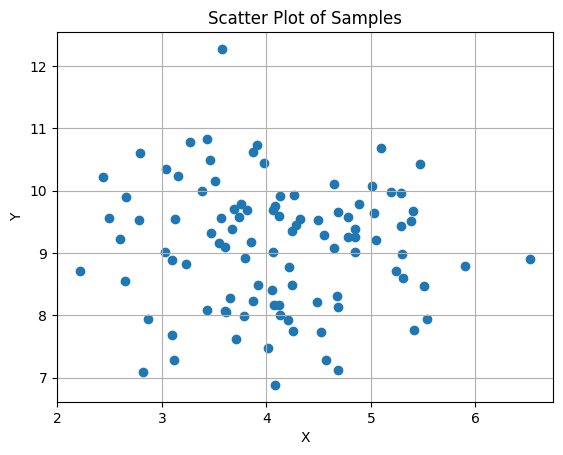

In [4]:
# parameters
N = 100
mean = np.array([4, 9])
cov = np.eye(2)

# introduce covariance matrix and mean
# samples = np.random.multivariate_normal(m, cov, N)
samples = generate_samples(N, mean, cov)

print(f'Empirical mean: {np.mean(samples, axis=1)}')
print(f'Empirical cov:\n{np.cov(samples)}')

plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()



**3.2)** Donner l'expression permettant de générer N=100 échantillons d'un vecteur aléatoire de moyenne m=[4 9] et de matrice de covariance diagonale s= [1 0 ; 0 6] Vérifier votre résultat en utilisant les fonctions mean et cov et afficher les échantillons.

Empirical mean: [4.05329402 8.68579433]
Empirical cov:
[[ 1.09740112 -0.17217057]
 [-0.17217057  6.38851944]]


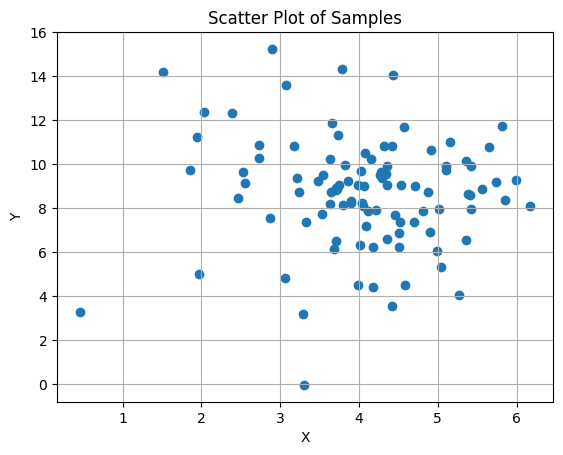

In [5]:
N = 100
mean = np.array([4, 9])
cov = np.array([[1, 0], [0, 6]])

# samples = np.random.multivariate_normal(m, s, N)
samples = generate_samples(N, mean, cov)

print(f'Empirical mean: {np.mean(samples, axis=1)}')
print(f'Empirical cov:\n{np.cov(samples)}')

plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()


**3.3)** Soit X un vecteur aléatoire gaussien centré de matrice de covariance égale à l'identité. Chercher une transformation linéaire X'= U X qui permette d'obtenir un vecteur aléatoire centré de matrice de covariance S .

**3.4)** Générer des échantillons dont la matrice de covariance est égale à s = [2 2 ; 2 5]

Vérifier votre résultat avec les fonctions mean et cov.



Empirical mean of X': [-0.22593236 -0.1548709 ]
Empirical covariance of X':
[[2.15364794 1.56785681]
 [1.56785681 3.77494106]]


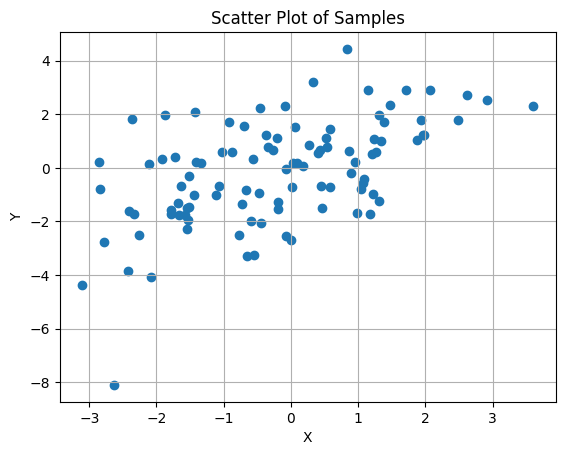

In [6]:
N = 100
X = np.random.randn(2, N)
s = np.array([[2, 2], [2, 5]])

# U is the lower triangular matrix of the Cholesky decomposition
U = np.linalg.cholesky(s)

# Apply the linear transformation to obtain X'
X_prime = np.dot(U, X)

X_prime_mean = np.mean(X_prime, axis=1)
X_prime_cov = np.cov(X_prime)

print(f"Empirical mean of X': {X_prime_mean}")
print(f"Empirical covariance of X':\n{X_prime_cov}")

plt.scatter(X_prime[0], X_prime[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()


Calculer l'orientation de l'ellipsoide de Mahalanobis asscocié à s.


In [7]:
a = 0.5 * np.arctan2(2 * s[0, 1], s[0, 0] - s[1, 1])
a = math.degrees(a)
print(f'Angle of rotation: {round(a, 2)}º')

Angle of rotation: 63.43º



Vérifier la relation liant s à sa matrice diagonalisée Sd : s=V.Sd.Vt avec V, matrice des vecteurs propres de s.

In [8]:
eigenvalues, eigenvectors = eig(s)

Sd = np.diag(eigenvalues)
V = eigenvectors

s_prime = np.dot(np.dot(V, Sd), V.T)
print(f'Original covariance matrix:\n{s}')
print(f'Rotated covariance matrix:\n{s_prime}')

Original covariance matrix:
[[2 2]
 [2 5]]
Rotated covariance matrix:
[[2. 2.]
 [2. 5.]]


**3.5)** Générer dans les matrices x1, x2, x3, trois vecteurs aléatoires gaussiens en dimension 2 (100 échantillons par vecteur). On donne:

m1 = [4 9] s1 = [2 2, 2 5]

m2 = [8.5 7.5] s2 = [2 - 2, - 2 5 ]

m3 = [6 3.5] s3 = [7 - 4, - 4 7 ]

Afficher l'ensemble des échantillons, chaque classe dans une couleur différente.



Empirical mean of x1: [4.13446576 9.18575798]
Empirical cov of x1:
[[1.70585444 1.49928625]
 [1.49928625 5.35770836]]
Empirical mean of x2: [8.62602723 7.43138543]
Empirical cov of x2:
[[ 1.54126735 -1.24271479]
 [-1.24271479  4.81127582]]
Empirical mean of x3: [5.60188808 4.00945437]
Empirical cov of x3:
[[ 6.58770124 -3.43274175]
 [-3.43274175  4.90169403]]


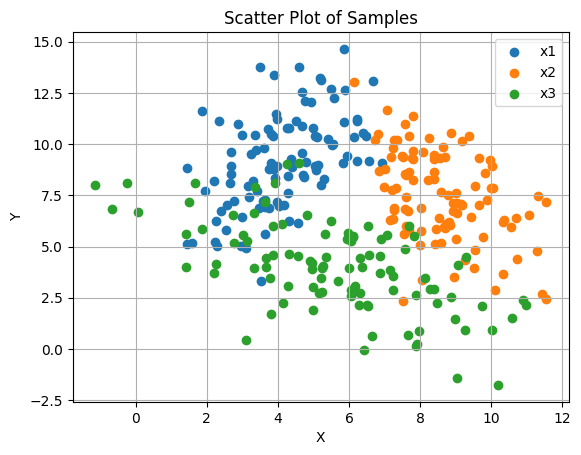

In [9]:
N = 100

m1 = np.array([4, 9])
s1 = np.array([[2, 2], [2, 5]])

m2 = np.array([8.5, 7.5])
s2 = np.array([[2, -2], [-2, 5]])

m3 = np.array([6, 3.5])
s3 = np.array([[7, -4], [-4, 7]])

x1 = generate_samples(N, m1, s1)
x2 = generate_samples(N, m2, s2)
x3 = generate_samples(N, m3, s3)

print(f'Empirical mean of x1: {np.mean(x1, axis=1)}')
print(f'Empirical cov of x1:\n{np.cov(x1)}')
print(f'Empirical mean of x2: {np.mean(x2, axis=1)}')
print(f'Empirical cov of x2:\n{np.cov(x2)}')
print(f'Empirical mean of x3: {np.mean(x3, axis=1)}')
print(f'Empirical cov of x3:\n{np.cov(x3)}')

plt.scatter(x1[0], x1[1], label='x1')
plt.scatter(x2[0], x2[1], label='x2')
plt.scatter(x3[0], x3[1], label='x3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()



**4. Courbes d'équidensité**

**4.1)** Ouvrir une autre fenêtre. Créer une grille de points X(i), Y(j) répartis régulièrement dans l'espace de taille 57x57 entre les valeurs 0.27 et 12.5 pour la première mesure et -2 et 15 pour la deuxième mesure (Utiliser la fonction linspace).

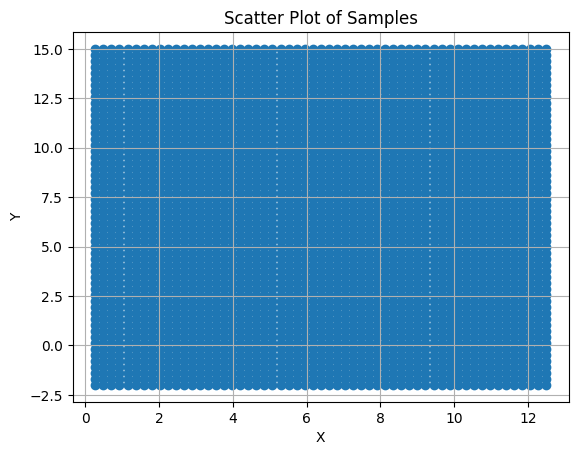

In [10]:
x_min = 0.27
x_max = 12.5
y_min = -2
y_max = 15

grid_size = 57

X, Y = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()



**4.2)** Pour la classe 1 de la question 3.5, construire la matrice dens1(i,j) contenant la densité de probabilité conditionnelle en chaque point (X(i), Y(j)) de la grille.

In [16]:
# Initialize the density matrix
dens1 = np.zeros((grid_size, grid_size))

denominator = 2 * np.pi * np.sqrt(det(s1))

# Calculate the conditional probability density at each point
for i in range(grid_size):
    for j in range(grid_size):
        x = X[i, j]
        y = Y[i, j]
        term = np.array([x, y]) - m1
        inv_cov = np.linalg.inv(s1)
        dens1[i, j] = (1 / denominator) * np.exp(-0.5 * np.dot(np.dot(term.T, inv_cov), term))
        # dens1[i, j] = (1 / denominator) * np.exp(-0.5 * np.dot(np.dot(np.array([x, y]) - m1, np.linalg.inv(cov)), np.array([x, y]) - m1))

# Print the density matrix
print(dens1)


[[2.99605728e-07 2.59993923e-07 2.16827682e-07 ... 2.81560028e-35
  2.85667014e-36 2.78540042e-37]
 [6.15701866e-07 5.46237044e-07 4.65725774e-07 ... 1.90836499e-34
  1.97946639e-35 1.97320981e-36]
 [1.22701518e-06 1.11290530e-06 9.70074142e-07 ... 1.25432764e-33
  1.33013364e-34 1.35555769e-35]
 ...
 [1.89685445e-09 5.42896669e-09 1.49327155e-08 ... 1.72838078e-09
  5.78360477e-10 1.85992843e-10]
 [7.42072326e-10 2.17133583e-09 6.10585107e-09 ... 2.23008666e-09
  7.62919146e-10 2.50826682e-10]
 [2.81525393e-10 8.42162560e-10 2.42110003e-09 ... 2.79037878e-09
  9.75927439e-10 3.28027566e-10]]


**4.3)** Afficher les courbes d'équidensités pour la classe 1 à l'aide de la fonction contour. Quelle est la forme de ces courbes ?


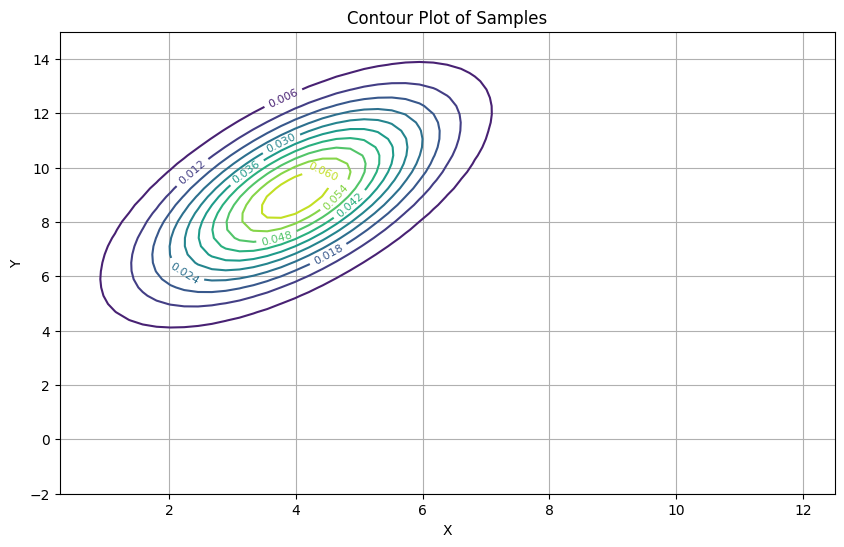

In [17]:
plt.figure(figsize=(10, 6))
contour = plt.contour(X, Y, dens1, 10)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Contour Plot of Samples')
plt.show()

[[[ 0.27       -2.        ]
  [ 0.48839286 -2.        ]
  [ 0.70678571 -2.        ]
  ...
  [12.06321429 -2.        ]
  [12.28160714 -2.        ]
  [12.5        -2.        ]]

 [[ 0.27       -1.69642857]
  [ 0.48839286 -1.69642857]
  [ 0.70678571 -1.69642857]
  ...
  [12.06321429 -1.69642857]
  [12.28160714 -1.69642857]
  [12.5        -1.69642857]]

 [[ 0.27       -1.39285714]
  [ 0.48839286 -1.39285714]
  [ 0.70678571 -1.39285714]
  ...
  [12.06321429 -1.39285714]
  [12.28160714 -1.39285714]
  [12.5        -1.39285714]]

 ...

 [[ 0.27       14.39285714]
  [ 0.48839286 14.39285714]
  [ 0.70678571 14.39285714]
  ...
  [12.06321429 14.39285714]
  [12.28160714 14.39285714]
  [12.5        14.39285714]]

 [[ 0.27       14.69642857]
  [ 0.48839286 14.69642857]
  [ 0.70678571 14.69642857]
  ...
  [12.06321429 14.69642857]
  [12.28160714 14.69642857]
  [12.5        14.69642857]]

 [[ 0.27       15.        ]
  [ 0.48839286 15.        ]
  [ 0.70678571 15.        ]
  ...
  [12.06321429 15.      

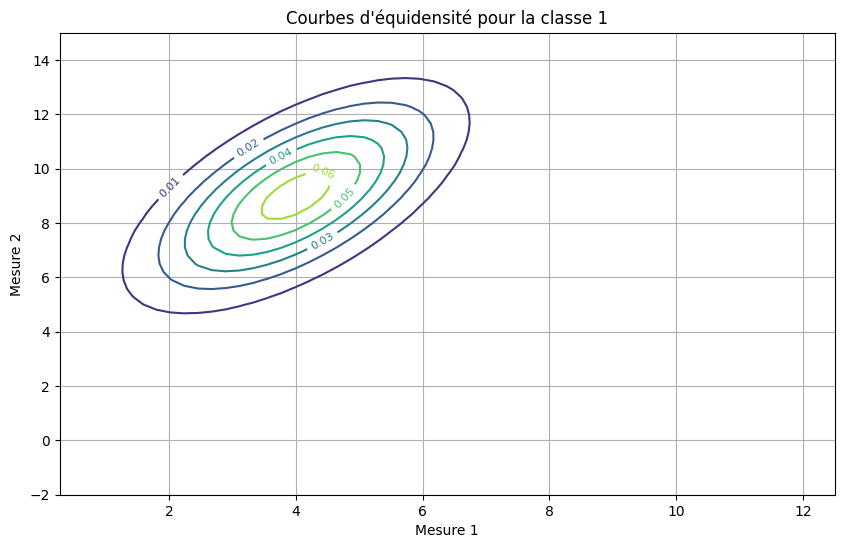

In [15]:
# Paramètres de la distribution pour la classe 1 (pris d'après la question précédente)
m1 = np.array([4, 9])
s1 = np.array([[2, 2], [2, 5]])

# Création de la distribution multivariée pour la classe 1
rv_classe1 = scipy.stats.multivariate_normal(m1, s1)

# Calcul de la densité de probabilité pour chaque point de la grille
densite_classe1 = rv_classe1.pdf(np.dstack((X, Y)))

plt.figure(figsize=(10, 6))
contour = plt.contour(X, Y, densite_classe1)
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Courbes d\'équidensité pour la classe 1')
plt.xlabel('Mesure 1')
plt.ylabel('Mesure 2')
plt.grid(True)
plt.show()




**4.4)** Faire de même pour les deux autres classes. Représenter en 3-D sur la même figure les trois lois de densités conditionnelles (utiliser la fonction mesh).
Expliquer l'allure des amplitudes maximales des lois de densités